# Table of Contents

1. [Introduction](#introduction)
2. [Notebook settings](#notebook-settings)
3. [Data Loading Cleaning and Checking](#data-loading-cleaning-and-checking)
4. [EDA](#eda)
   1. [Multicollinearity Analysis](#multicollinearity-analysis)
   2. [Model Testing - First Approach: OLS with All Features (No Transformation)](#model-testing---first-approach-ols-with-all-features-no-transformation)
   3. [Model Testing - Second Approach: OLS with All Features -> Box-Cox Transformation](#model-testing---second-approach-ols-with-all-features---box-cox-transformation)
   4. [Model Testing - Third Approach: OLS with Reduced Features (Based on VIF)](#model-testing---third-approach-ols-with-reduced-features-based-on-vif)
   5. [Hypothesis Testing](#hypothesis-testing)
   6. [Model Comparison and Evaluation](#model-comparison-and-evaluation)
   7. [QQ Plots for Residuals Analysis](#qq-plots-for-residuals-analysis)
   8. [Final Conclusion](#final-conclusion)
5. [Suggestions for Improvement](#suggestions-for-improvement)

## Introduction
The dataset used in this project can be found here: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009<br/>
It presents quemical data of red wine samples and their quality.<br/>
Only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).<br/>
- Goal: <br/>
  - Practice choosing variables and their transformations for a model.<br/>
  - Practice fitting a linear regression model.<br/>
  - Practice interpreting a fitted model’s coefficients and communicating uncertainty around them.<br/>

The dataset contains the following columns:

**Input variables (based on physicochemical tests):**
| Column  | Description | Datatype | Count |
|--|--|--|--|
| fixed acidity         | most acids involved with wine or fixed or nonvolatile (do not evaporate readily) | float64 | 1599 |
| volatile acidity      | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste | float64 | 1599 |
| citric acid           | found in small quantities, citric acid can add 'freshness' and flavor to wines | float64 | 1599 |
| residual sugar        | the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet | float64 | 1599 |
| chlorides             | the amount of salt in the wine | float64 | 1599 |
| free sulfur dioxide   | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. | float64 | 1599 |
| total sulfur dioxide  | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine | float64 | 1599 |
| density               | the density of wine is close to that of water depending on the percent alcohol and sugar content | float64 | 1599 |
| pH                    | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale | float64 | 1599 |
| sulphates             | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant | float64 | 1599 |
| alcohol               | the percent alcohol content of the wine | float64 | 1599 |

**Output variable (based on sensory data):**
| Column  | Description | Datatype | Count |
|--|--|--|--|
| quality               | output variable (based on sensory data, score between 0 and 10) | int64 | 1599 |

## Notebook settings

In [1]:
from assets.utils.functions import *

In [2]:
from assets.utils.functions import *
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PowerTransformer  
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Loading, Cleaning, and Checking

In [3]:
wine_df = pd.read_csv('assets/data/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Replace blank spaces with _ for each column
wine_df.columns = wine_df.columns.str.replace(' ', '_')

In [5]:
print(wine_df.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
print(f"\nNumber of duplicate rows: {wine_df.duplicated().sum()}")


Number of duplicate rows: 240


As we can see, it seems the dataset does not present null values, neither missing values and datatypes looks already correct with no need to applying any conversions or further cleaning.<br/>

Since for duplicated rows we found 240 records and considering the dataset cointains only Input variables (based on physicochemical tests), it supposed that the duplicated rows are not a mistake, but a real data.<br/>

Also, since these data is not labeled, we can't check if the duplicated rows are correct or not. Therefore, we will keep them in the dataset.
So, the dataframe is ready for a proper analysis.

## EDA

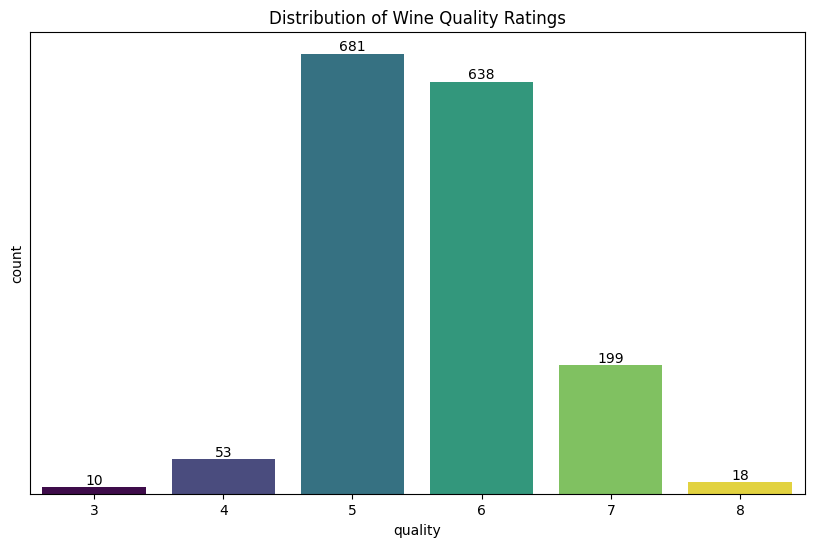

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='quality',
                   data=wine_df,
                   hue='quality',
                   palette="viridis")
plt.title('Distribution of Wine Quality Ratings')

# Plot counts for each bar
for container in ax.containers:
    ax.bar_label(container)

# Remove y-axis numbers
ax.yaxis.set_ticks([])

# Remove the legend
ax.legend_.remove()

plt.show()

**Quality Rating Distribution**

- Distribution Skewed Towards Middle Ratings:
The majority of wine samples are rated as 5 and 6.
Quality rating 5 has the highest frequency with 681 samples.
Quality rating 6 follows closely with 638 samples.

- Moderate Quality Wines are Most Common:
The distribution suggests that moderate quality wines (ratings of 5 and 6) are the most common in the dataset.

- Imbalance in Quality Ratings:
There is an imbalance in the distribution of quality ratings, which could affect model performance, particularly for high (7, 8) and low (3, 4) quality wines.

- Focus on Middle Quality Predictions:
Given the skew towards middle ratings, the model might perform better for moderate quality wines.

### Target Variable and Hypothesis formulation
The target variable for this analysis is the `quality` column, which has scores going from 3 to 8, as previously seen in the Summary Stats part above.<br/>

The hypotesis we are going to focus is formulated as below:<br/>
	•	Hypothesis: "Alcohol content has a positive impact on perceived wine quality."<br/>
	•	Null Hypothesis: "Alcohol content has no impact on perceived wine quality."<br/>

So, first we will check the distribution of `quality` ratings in the dataset.

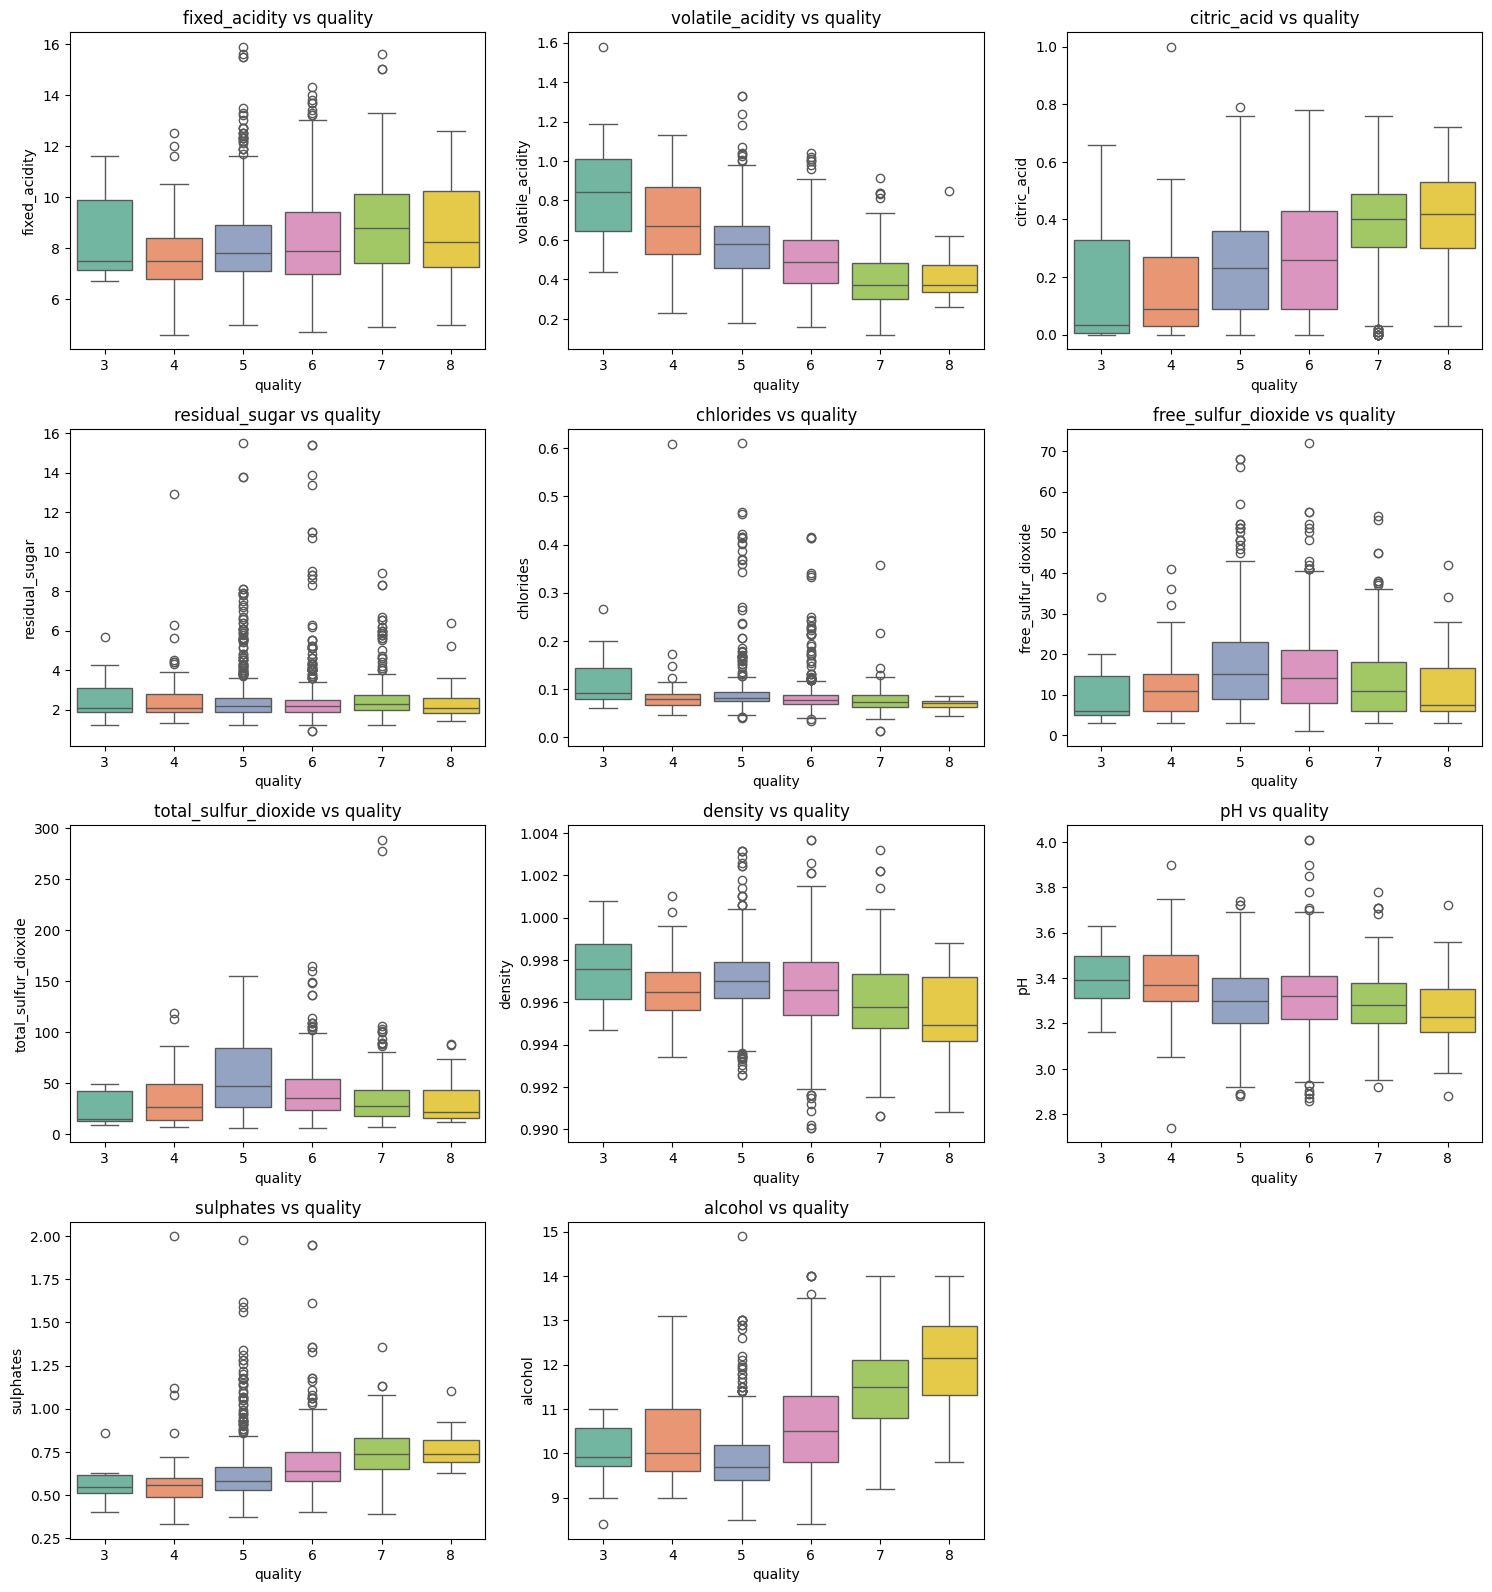

In [9]:
plot_features_against_quality(wine_df)

**Summary of Insights:**<br/>

**Positive Correlations with Quality:** Citric acid, sulphates, and alcohol show positive trends with higher quality wines.<br/>

**Negative Correlations with Quality:** Volatile acidity and chlorides tend to be lower in higher quality wines.<br/>

**No Clear Trends:** Fixed acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, density, and pH do not show strong relationships with wine quality.<br/>

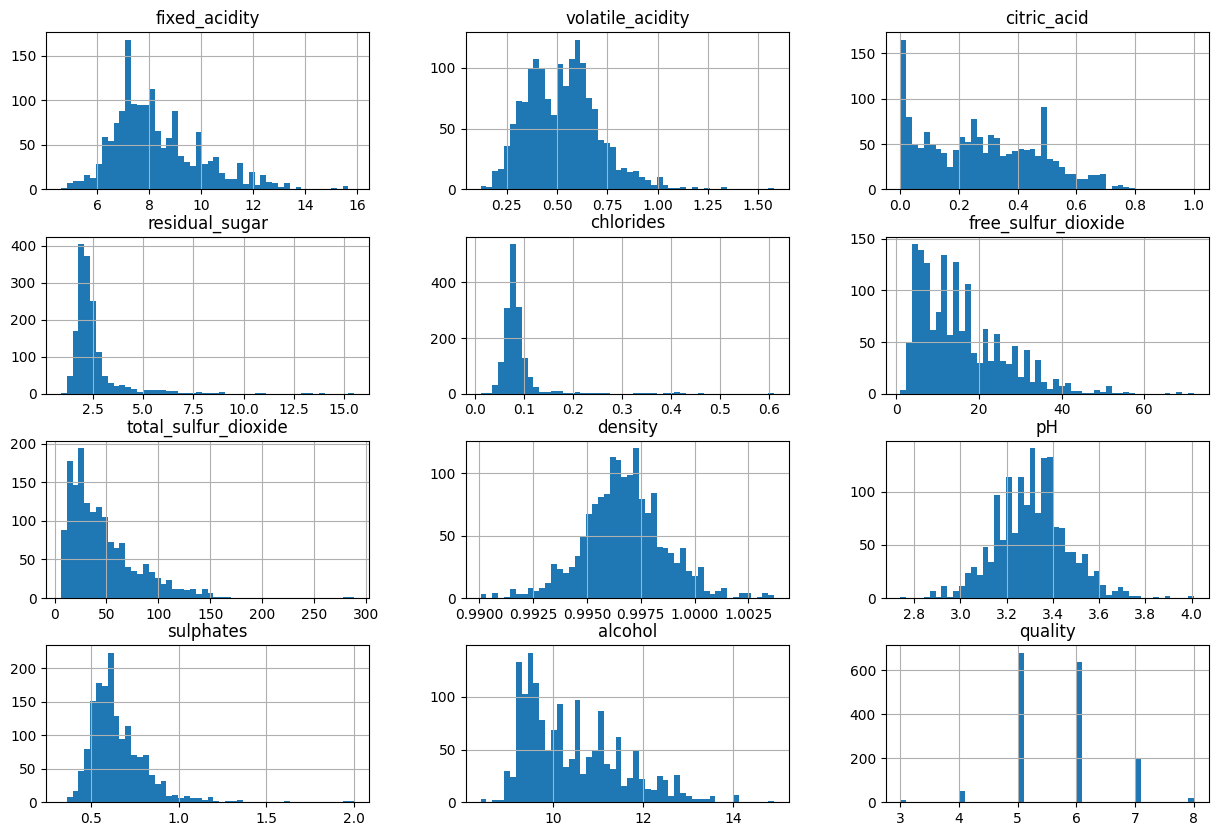

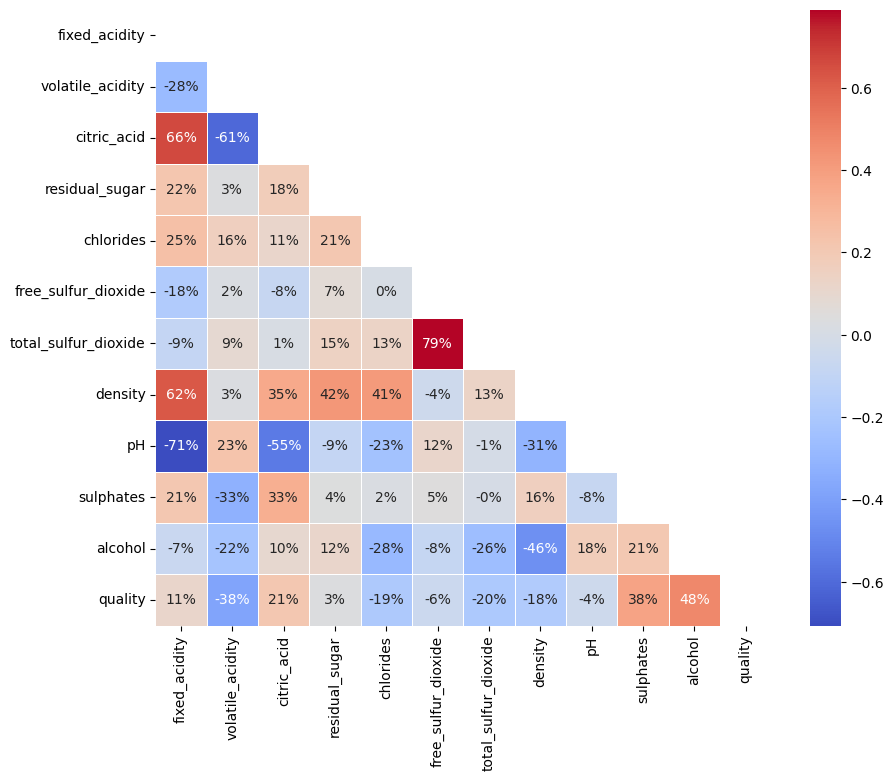

In [10]:
plot_hist_corr(wine_df)

**Features Distribution Insights:**
- Features with Roughly Normal Distribution:<br/>
  - Fixed Acidity: slightly skewed to the right.<br/>
  - Density: Fairly normal but slightly skewed to the left.<br/>
  - pH: Roughly normal.<br/>

- Features with Non-Normal Distribution (Right-Skewed):<br/>
  - Volatile Acidity<br/>
  - Citric Acid: Right-skewed with a peak at the lower end.<br/>
  - Residual Sugar: Heavily right-skewed with a long tail.<br/>
  - Chlorides: Heavily right-skewed.<br/>
  - Free Sulfur Dioxide: Right-skewed with a peak at the lower end.<br/>
  - Total Sulfur Dioxide<br/>
  - Sulphates<br/>
  - Alcohol<br/>

- Features with Categorical Distribution:
  - Quality: Most wines have a quality score of 5, 6, or 7, with fewer wines scoring at the extremes (3, 4, 8).

**Multicollinearity Insights:**<br/>

- Fixed Acidity and Citric Acid: Correlation of 0.66 suggests these variables are moderately related.<br/>
- Free Sulfur Dioxide and Total Sulfur Dioxide: High correlation (0.79) indicates these variables are strongly related, which is expected since free sulfur dioxide is a part of the total sulfur dioxide.<br/>
- Density and Residual Sugar: Correlation of 0.42 suggests a moderate relationship, which makes sense as residual sugar would contribute to the overall density.<br/>
- pH and Fixed Acidity: High negative correlation (-0.71) suggests an inverse relationship between pH levels and fixed acidity.<br/>

**Summary:**<br/>
- Positive Influences on Quality: Alcohol, Sulphates, Citric Acid.<br/>
- Negative Influences on Quality: Volatile Acidity, Chlorides, Density, Total Sulfur Dioxide.<br/>
- Minimal Influence: Fixed Acidity, Residual Sugar, Free Sulfur Dioxide, pH.<br/>

## Data Preprocessing and Splitting

In [11]:
# Split the data into training and hold-out sets
train_df, holdout_df = train_test_split(
    wine_df, test_size=0.2, random_state=42)

# Select features and the target variable
X_train = train_df.drop(columns=['quality'])
y_train = train_df['quality']
X_holdout = holdout_df.drop(columns=['quality'])
y_holdout = holdout_df['quality']

## Multicollinearity Analysis


I decided to check the Multicollinearity between independent variables.<br/>

In [12]:
# Calculate VIF for each feature
X_train_const = sm.add_constant(X_train)
vif = pd.DataFrame()
vif['Variable'] = X_train_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_const.values, i) 
              for i in range(X_train_const.shape[1])]
print(vif)

                Variable           VIF
0                  const  1.678384e+06
1          fixed_acidity  7.374554e+00
2       volatile_acidity  1.813146e+00
3            citric_acid  3.211154e+00
4         residual_sugar  1.731605e+00
5              chlorides  1.519827e+00
6    free_sulfur_dioxide  1.982913e+00
7   total_sulfur_dioxide  2.203259e+00
8                density  6.016488e+00
9                     pH  3.275199e+00
10             sulphates  1.455527e+00
11               alcohol  2.933465e+00


**VIF Analysis:**<br/>

The VIF calculation helps identify multicollinearity among the features. High VIF values indicate that a feature is highly correlated with other features in the dataset, which can lead to unreliable coefficient estimates.<br/>

Although the interpretation for Multicollinearity is not straightforward, the general rule of thumb is as follows:<br/>

  - VIF < 5: Generally considered acceptable; indicates low multicollinearity.<br/>
  - VIF between 5 and 10: Moderate multicollinearity; may warrant further investigation.<br/>
  - VIF > 10: High multicollinearity; suggests a problematic level of multicollinearity.<br/>

- fixed_acidity (VIF = 7.37) and density (VIF = 6.02) have high VIF values, suggesting multicollinearity.<br/>
Features with lower VIF values are generally preferred as they contribute more independent information to the model.

## Model Testing - First Approach: OLS with All Features (No Transformation)

In [13]:
# Fit the model with all features (no transformation)
X_train_const = sm.add_constant(X_train)
X_holdout_const = sm.add_constant(X_holdout)

model_all = sm.OLS(y_train, X_train_const).fit()
print("\nModel with All Features (No Transformation) Summary:")
print(model_all.summary())


Model with All Features (No Transformation) Summary:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     61.48
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          1.48e-109
Time:                        19:13:48   Log-Likelihood:                -1266.4
No. Observations:                1279   AIC:                             2557.
Df Residuals:                    1267   BIC:                             2619.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

### Insights from OLS Regression Results -> First Approach:<br/>

- Overview:<br/>
  - R-squared (Training Dataset): 0.348 -> approximately 34.8% of the variance in wine quality is explained by the model, based on the predictors included.<br/>
  - Adjusted R-squared: 0.342 -> this suggests a slight penalty for including predictors that do not significantly improve the model fit.<br/>
  - Multicollinearity issues raised concerns about the reliability of the model.<br/>

- Significant Predictors (coefficients and p-value < 0.05):<br/>
  - Volatile Acidity: Higher volatile acidity is strongly associated with lower wine quality.<br/>
  - Chlorides: Higher chloride levels are significantly associated with lower wine quality.<br/>
  - Sulphates: Higher sulphates are significantly associated with higher wine quality.<br/>
  - Alcohol: Higher alcohol content is strongly associated with higher wine quality.<br/>
  - Free Sulfur Dioxide: Higher levels of free sulfur dioxide are associated with a slight increase in wine quality.<br/>
  - Total Sulfur Dioxide: Higher levels of total sulfur dioxide are significantly associated with lower wine quality.<br/>
- Other Predictors:<br/>
  - Fixed Acidity, Citric Acid, Residual Sugar, Density, pH: These variables have higher p-values (> 0.05), indicating that they are not statistically significant in explaining wine quality in this model.<br/>

## Model Testing - Second Approach: OLS with All Features -> Box-Cox Transformation

The Box-Cox transformation is applied to make the data more normally distributed, which can improve the linear relationship between the features and the target variable, leading to potentially better model performance.

In [14]:
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
X_train_boxcox = boxcox_transformer.fit_transform(X_train + 1) # avoid 0 values
X_holdout_boxcox = boxcox_transformer.transform(X_holdout + 1)

# Ensure index alignment
X_train_boxcox_df = pd.DataFrame(X_train_boxcox, 
                                 columns=X_train.columns,
                                 index=X_train.index)
X_holdout_boxcox_df = pd.DataFrame(X_holdout_boxcox, 
                                   columns=X_holdout.columns,
                                   index=X_holdout.index)

X_train_boxcox_df = sm.add_constant(X_train_boxcox_df)
X_holdout_boxcox_df = sm.add_constant(X_holdout_boxcox_df)

# Fit the model with Box-Cox transformed features
model_all_boxcox = sm.OLS(y_train, X_train_boxcox_df).fit()
print("\nModel with All Features (Box-Cox Transformed) Summary:")
print(model_all_boxcox.summary())



Model with All Features (Box-Cox Transformed) Summary:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     64.22
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          9.46e-114
Time:                        19:13:49   Log-Likelihood:                -1256.5
No. Observations:                1279   AIC:                             2537.
Df Residuals:                    1267   BIC:                             2599.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

### Insights from OLS Regression Results -> Second Approach:<br/>

- Overview:<br/>
  - R-squared: The model explains 35.8% of the variance in wine quality, which indicates a moderate fit.<br/>
  - Adjusted R-squared: 0.352 -> is slightly lower, accounting for the number of predictors in the model. This suggests that the model is capturing some, but not all, of the variability in wine quality.<br/>
  - Multicollinearity issues raised concerns about the reliability of the model.<br/>

- Significant Predictors (coefficients and p-value < 0.05):<br/>
  - Fixed Acidity: Positive and significant, with a coefficient of 4.9402. An increase in fixed acidity is associated with a slight increase in wine quality, indicating that this factor positively influences the perceived quality of wine.<br/>
  - Volatile Acidity: Negative and significant, with a coefficient of -2.1957. Higher levels of volatile acidity are associated with a decrease in wine quality, consistent with the understanding that volatile acidity can produce undesirable vinegar-like flavors.<br/>
  - Citric Acid: Negative and significant, with a coefficient of -0.4502. Higher levels of citric acid, while often adding freshness, are linked to a slight reduction in wine quality in this dataset.<br/>
  - Residual Sugar: Positive and significant, with a coefficient of 3.0520. Higher residual sugar content is associated with a higher quality rating, although the effect size is modest.<br/>
  - Chlorides: Strongly negative and significant, with a coefficient of -12.2315. Higher chloride levels, which indicate salt content, are strongly associated with a lower quality rating, as excessive salt can negatively impact taste.<br/>
  - Total Sulfur Dioxide: Negative and significant, with a coefficient of -0.1268. Higher levels of total sulfur dioxide are associated with lower wine quality, likely due to its impact on wine preservation, which can lead to unwanted chemical tastes if overused.<br/>
  - Density: Strongly negative and significant, with a coefficient of -1.047e+06. This suggests that higher density, possibly indicative of higher sugar or alcohol content, has a strongly negative impact on wine quality in this context.<br/>
  - Sulphates: Strongly positive and significant, with a coefficient of 20.2285. Higher levels of sulphates, which act as preservatives, are associated with higher wine quality.<br/>
  - Alcohol: Strongly positive and significant, with a coefficient of 2.788e+04. Higher alcohol content is strongly associated with higher wine quality, aligning with the hypothesis that alcohol content improves perceived quality.

## Model Testing - Third Approach: OLS with Reduced Features (Based on VIF)

In [15]:
# Drop high VIF features (e.g., 'fixed_acidity', 'density')
X_train_reduced = X_train.drop(columns=['fixed_acidity', 'density',
                                        'citric_acid', 'pH',
                                        'residual_sugar', 'free_sulfur_dioxide',
                                        'total_sulfur_dioxide'])
X_holdout_reduced = X_holdout.drop(columns=['fixed_acidity', 'density',
                                            'citric_acid', 'pH',
                                            'residual_sugar', 'free_sulfur_dioxide',
                                            'total_sulfur_dioxide'])

# Fit model with reduced features
X_train_reduced_const = sm.add_constant(X_train_reduced)
X_holdout_reduced_const = sm.add_constant(X_holdout_reduced)

model_reduced = sm.OLS(y_train, X_train_reduced_const).fit()
print("\nModel with Reduced Features Summary (Based on VIF):")
print(model_reduced.summary())


Model with Reduced Features Summary (Based on VIF):
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     156.0
Date:                Sat, 10 Aug 2024   Prob (F-statistic):          1.03e-108
Time:                        19:13:49   Log-Likelihood:                -1284.9
No. Observations:                1279   AIC:                             2580.
Df Residuals:                    1274   BIC:                             2606.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

### Insights from OLS Regression Results (Model with Reduced Features (Based on VIF):<br/>

- Overview:<br/>
  - R-squared: The model explains 32.9% of the variance in wine quality, which is moderately strong.<br/>
  - Adjusted R-squared: 0.327 -> The adjusted R-squared of 32.7% is very close to the R-squared value, suggesting that the model is well-balanced and that the included predictors are relevant without adding unnecessary complexity.<br/>
  - It does not present Multicollinearity issues<br/>

- Significant Predictors (coefficients and p-value < 0.05):<br/>
  - Intercept (const): The intercept is significant and indicates the baseline level of wine quality when all predictors are at their average values.<br/>
  - Volatile Acidity: Negative and highly significant, with a coefficient of -1.1001. This indicates that higher levels of volatile acidity strongly decrease wine quality, which is consistent with its potential to produce off-flavors.<br/>
  - Chlorides: Negative and significant, with a coefficient of -1.5769. Higher chloride levels, which indicate salt content, are associated with lower wine quality, reflecting the detrimental effect of excessive saltiness on taste.<br/>
  - Sulphates: Positive and significant, with a coefficient of 0.8175. Higher levels of sulphates, which act as preservatives, are associated with higher wine quality, indicating that sulphates contribute positively to the preservation and taste of the wine.<br/>
  - Alcohol: Strongly positive and significant, with a coefficient of 0.2939. This suggests that higher alcohol content is strongly associated with higher wine quality, aligning with the hypothesis that alcohol content improves perceived quality.<br/>

- Confidence Intervals:<br/>
  
  - _Intercept (const):_<br/>
    Coefficient: 2.7454<br/>
    95% Confidence Interval: [2.302, 3.189]<br/>
Interpretation: The intercept (constant) is the expected wine quality score when all the predictor variables (volatile acidity, chlorides, sulphates, alcohol) are zero. The confidence interval does not include zero, indicating that the intercept is statistically significant. The relatively narrow interval suggests that the estimate is precise.

  - _Volatile Acidity:_<br/>
    Coefficient: -1.1001<br/>
    95% Confidence Interval: [-1.317, -0.884]<br/>
Interpretation: The negative coefficient indicates that an increase in volatile acidity is associated with a decrease in wine quality. The confidence interval does not include zero, which confirms that volatile acidity has a statistically significant negative effect on wine quality. The interval is reasonably narrow, suggesting a precise estimate of this effect.<br/>

  - _Chlorides:_<br/>
    Coefficient: -1.5769<br/>
    95% Confidence Interval: [-2.414, -0.740]<br/>
Interpretation: Chlorides also have a negative coefficient, meaning higher levels of chlorides are associated with lower wine quality. The confidence interval excludes zero, indicating statistical significance. However, the interval is somewhat wider compared to volatile acidity, suggesting more variability in the estimate, but it is still significant.<br/>

  - _Sulphates:_<br/>
    Coefficient: 0.8175<br/>
    95% Confidence Interval: [0.578, 1.057]<br/>
Interpretation: The positive coefficient suggests that an increase in sulphates is associated with an increase in wine quality. The confidence interval does not include zero, confirming statistical significance. The interval is fairly narrow, indicating a precise estimate of the effect.<br/>

  - _Alcohol:_<br/>
    Coefficient: 0.2939<br/>
    95% Confidence Interval: [0.257, 0.330]<br/>
Interpretation: Alcohol content has a positive effect on wine quality, as indicated by the positive coefficient. The confidence interval does not include zero, showing strong statistical significance. The interval is very narrow, which implies a highly precise estimate, making alcohol one of the most reliable predictors in the model.

### Hypothesis Testing

In [16]:
# Hypothesis Testing
# H0: "Alcohol content has no impact on perceived wine quality."
# H1: "Alcohol content has a positive impact on perceived wine quality."

# Extract the coefficient and p-value for the 'alcohol' variable
alcohol_coef = model_reduced.params['alcohol']
alcohol_pvalue = model_reduced.pvalues['alcohol']

# Display the results
print(f"Alcohol Coefficient: {alcohol_coef}")
print(f"Alcohol p-value: {alcohol_pvalue}")

# Hypothesis testing decision
if alcohol_pvalue < 0.05:
    print("Reject the null hypothesis: Alcohol content has a significant "
          "positive impact on perceived wine quality.")
else:
    print("Fail to reject the null hypothesis: Alcohol content does not have "
          "a significant positive impact on perceived wine quality.")

Alcohol Coefficient: 0.2939209003966722
Alcohol p-value: 1.3474711519479874e-51
Reject the null hypothesis: Alcohol content has a significant positive impact on perceived wine quality.


**Insights on Hypothesis Testing Results:**<br/>

- Alcohol Coefficient: 0.2939 -> Each unit increase in alcohol content increases wine quality by approximately 0.294 units.
- Alcohol p-value: 1.35e-51 -> Extremely low, indicating strong evidence against the null hypothesis.<br/>
- Conclusion: There is strong statistical evidence that alcohol content has a significant positive impact on perceived wine quality.<br/>

## Model Comparison and Evaluation


In [17]:
# Evaluate each model
mse_all, mae_all, r2_all = evaluate_model(
    model_all, X_holdout_const, y_holdout)
mse_all_boxcox, mae_all_boxcox, r2_all_boxcox = evaluate_model(
    model_all_boxcox, X_holdout_boxcox_df, y_holdout)
mse_reduced, mae_reduced, r2_reduced = evaluate_model(
    model_reduced, X_holdout_reduced_const, y_holdout)

print("\nComparison of Model Performance:")
print(f"Model with All Features (No Transformation) - MSE: {mse_all}, "
      f"MAE: {mae_all}, R2: {r2_all}")
print(f"Model with All Features (Box-Cox) - MSE: {mse_all_boxcox}, "
      f"MAE: {mae_all_boxcox}, R2: {r2_all_boxcox}")
print(f"Model with Reduced Features (VIF Consideration) - MSE: {mse_reduced}, "
      f"MAE: {mae_reduced}, R2: {r2_reduced}")


Comparison of Model Performance:
Model with All Features (No Transformation) - MSE: 0.39002514396397386, MAE: 0.5035304415524223, R2: 0.4031803412795929
Model with All Features (Box-Cox) - MSE: 0.38402287532804735, MAE: 0.49277876529880127, R2: 0.41236506173744314
Model with Reduced Features (VIF Consideration) - MSE: 0.39583576287046485, MAE: 0.5162232158682217, R2: 0.3942888848019904


**Insights on Model Performance Comparison:**<br/>

**Overall Summary:**
Best Performing Model: The model with all features after Box-Cox transformation performs the best, showing the lowest MSE and MAE and the highest R-squared. This suggests that transforming the data helped the model better capture the relationships between the predictors and wine quality.

**Trade-off with Simplicity:** The reduced model, while simpler and easier to interpret, does not perform as well as the full model with or without transformation.

**Conclusion:** If the goal is to maximize predictive accuracy, the model with all features and Box-Cox transformation should be preferred. However, if interpretability and simplicity are more critical, the reduced model might still be a viable option, albeit with slightly lower predictive power.

## QQ Plots for Residuals Analysis

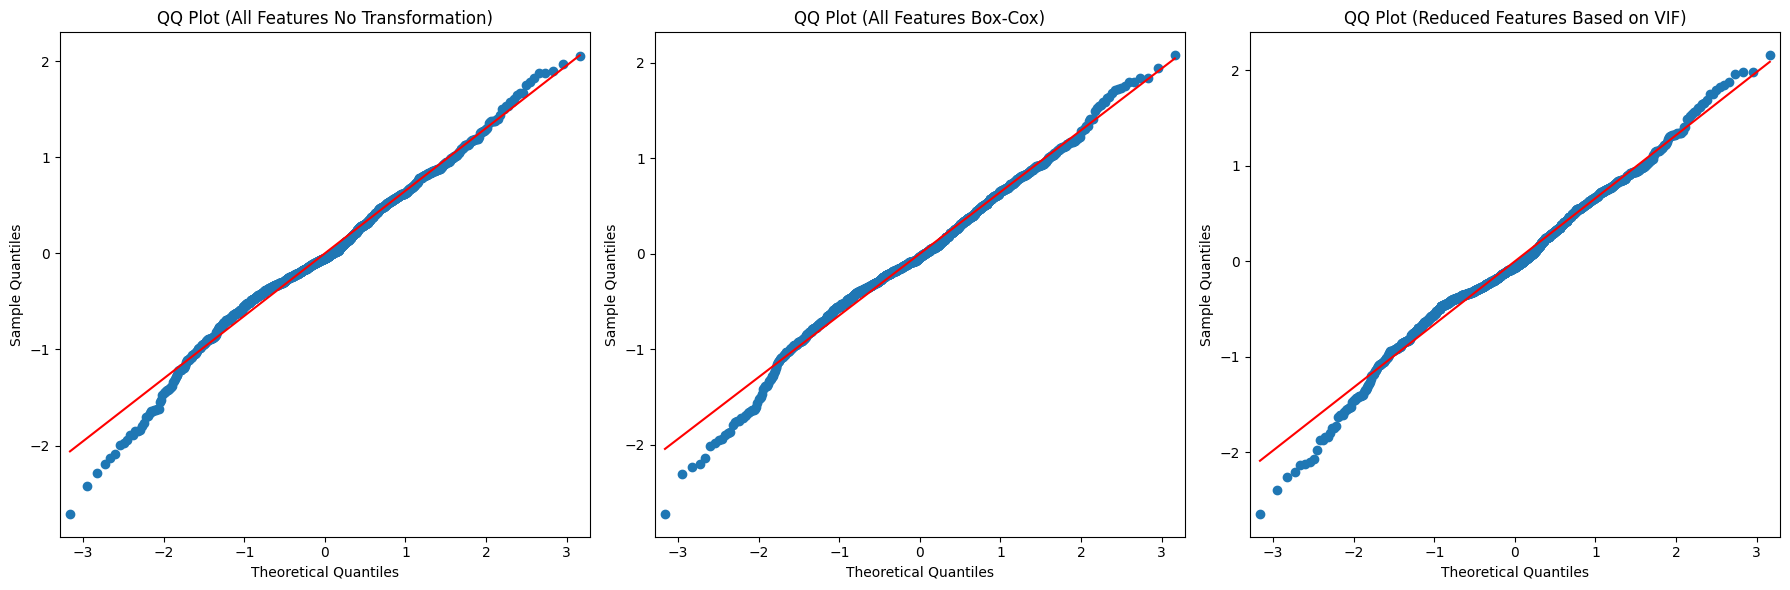

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sm.qqplot(model_all.resid, line='s', ax=axes[0])
axes[0].set_title('QQ Plot (All Features No Transformation)')

sm.qqplot(model_all_boxcox.resid, line='s', ax=axes[1])
axes[1].set_title('QQ Plot (All Features Box-Cox)')

sm.qqplot(model_reduced.resid, line='s', ax=axes[2])
axes[2].set_title('QQ Plot (Reduced Features Based on VIF)')

plt.tight_layout()
plt.show()

**Insights from QQ Plots:**<br/>
- QQ Plot (All Features No Transformation):<br/>
The residuals in this plot show some deviation from the theoretical quantiles, especially at the tails.<br/> This indicates that the residuals are not perfectly normally distributed, suggesting potential issues with the model's fit.<br/> The slight S-shape suggests that the model may not capture the underlying data patterns perfectly, possibly due to the presence of outliers or the effect of untransformed skewed variables.<br/>

- QQ Plot (All Features Box-Cox):<br/>
After applying the Box-Cox transformation, the residuals align more closely with the theoretical quantiles, especially in the middle range.<br/> This indicates an improvement in normality compared to the model with no transformation.<br/> The Box-Cox transformation appears to have helped stabilize variance and reduce skewness in the data, leading to a better model fit.<br/> However, some deviations still exist at the extremes, though they are less pronounced than in the non-transformed model.<br/>

- QQ Plot (Reduced Features Based on VIF):<br/>
The residuals for the model with reduced features (based on VIF) also show alignment with the theoretical quantiles but exhibit slight deviations at the tails.<br/> The plot suggests that the reduced model, while simpler, still struggles slightly with capturing the data's full complexity. The deviations, particularly at the extremes, might be due to the exclusion of some influential features, leading to a less accurate model.<br/>

**Summary:**
- Best Normality Fit: The model with all features and Box-Cox transformation demonstrates the best alignment with the normal distribution, suggesting that this model has the most normally distributed residuals and, therefore, the best fit among the three models.<br/>

- Impact of Feature Reduction: The reduced model (based on VIF) shows some deviations in the tails, indicating that reducing the number of features may have slightly compromised the model's ability to fit the data perfectly.<br/> However, this model still provides a reasonably good fit, with residuals mostly following the normal distribution.

## Final Conclusion

- **Model with All Features (No Transformation):**<br/> 
  This model included all the available features without any transformations. It explained approximately 40.3% of the variance in wine quality (R² = 0.4032) and showed moderate predictive performance. However, the model faced some issues with multicollinearity, particularly with variables like fixed acidity and density, which may have introduced some noise into the model.<br/>

- **Model with All Features (Box-Cox Transformation):**<br/>
  By applying the Box-Cox transformation to all features, we aimed to stabilize variance and make the data more normally distributed. This model performed slightly better, explaining 41.2% of the variance in wine quality (R² = 0.4124), and demonstrated improved predictive accuracy with lower MSE and MAE values. The QQ plot showed that the residuals were more normally distributed compared to the model without transformation, indicating a better model fit.<br/>
  
- **Model with Reduced Features (Based on VIF):**<br/> 
  This model excluded features with high Variance Inflation Factor (VIF) to reduce multicollinearity. While this model was simpler and more interpretable, it explained slightly less variance (R² = 0.3943) and had higher error metrics compared to the other two models. The reduction in the number of features likely led to the exclusion of some important information, resulting in a decrease in predictive power.


## Suggestions for Improvement

- **Outlier Analysis:**<br/>
Outliers can have a significant impact on the performance of regression models by skewing the results and affecting the assumptions of normality.<br/>

- **Handling Multicollinearity:**<br/>
Multicollinearity can inflate the variance of coefficient estimates and make the model unstable.<br/>

- **In-depth features analysis:**<br/>
I believe I could have explored more features, such as interactions between variables, polynomial features, or other transformations to capture more complex relationships in the data.<br/>
